In [1]:

library(dplyr)
library(ggplot2)

df <- read.csv("turkish_bert_attention_verb_to_nouns.csv")

stats <- df %>%
  group_by(case, number) %>%
  summarise(
    mean = mean(attention_diff),
    sem = sd(attention_diff) / sqrt(n()),
    .groups = 'drop'
  )


dodge_width <- 0.8


y_max <- max(stats$mean + stats$sem)
y_min <- min(stats$mean - stats$sem)

y_limit_upper <- y_max + 0.015
y_limit_lower <- y_min - 0.015
if (y_limit_upper < 0.01) { y_limit_upper = 0.01 }
if (y_limit_lower > -0.01) { y_limit_lower = -0.01 }

right_margin_size <- 8

p <- ggplot(stats, aes(x = case, y = mean, group = number, shape = number)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_errorbar(
    aes(ymin = mean - sem, ymax = mean + sem),
    width = 0.2,
    position = position_dodge(dodge_width),
    size = 0.5
  ) +
  geom_point(
    size = 4,
    position = position_dodge(dodge_width)
  ) +
  ylim(y_limit_lower, y_limit_upper) +
  scale_x_discrete(
    labels = c("Genitive", "Nominative")
  ) +
  labs(
    x = "",
    y = "Attention Difference",
    title = NULL,
    shape = ""
  ) +
  theme_bw() +
  theme(
    plot.title = element_blank(),
    axis.title.x = element_text(size = 12, margin = margin(t = 10)),
    axis.title.y = element_text(size = 12, margin = margin(r = 10)),
    panel.grid.minor = element_blank(),
    legend.position = "top",
    plot.margin = unit(c(0.5, right_margin_size, 0.5, 0.5), "lines")
  ) +
  geom_segment(
    aes(x = 2.9, xend = 2.9, y = 0.001, yend = y_limit_upper - 0.001),
    arrow = arrow(length = unit(0.015, "npc")),
    color = "darkgreen",
    size = 0.8
  ) +
  geom_segment(
    aes(x = 2.9, xend = 2.9, y = -0.001, yend = y_limit_lower + 0.001),
    arrow = arrow(length = unit(0.015, "npc")),
    color = "darkred",
    size = 0.8
  ) +
  annotate("text",
           x = 3, y = y_limit_upper * 0.5,
           label = "More Attention\nto Attractor\n(Attractor > Target)",
           hjust = 0, vjust = 0.5,
           size = 3.5,
           color = "darkgreen",
           fontface = "bold") +
  annotate("text",
           x = 3, y = y_limit_lower * 0.5,
           label = "More Attention\nto Target\n(Attractor < Target)",
           hjust = 0, vjust = 0.5,
           size = 3.5,
           color = "darkred",
           fontface = "bold") +
  coord_cartesian(clip = "off")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


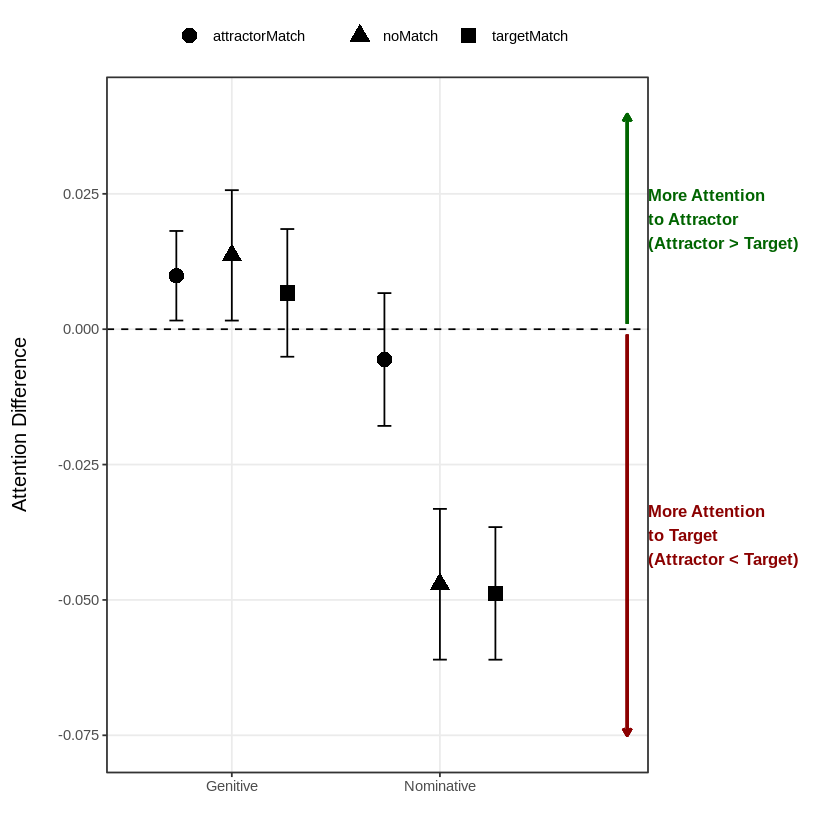

In [5]:
p
ggsave("r_bert_attention_plot_modified.png", plot = p, width = 9, height = 4)